# Support Vector Machine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets

## Part 1  SVM for Classification Problems
### Introduction 
1. What is Support Vector Machine (SVM) ? 
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.

Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).

### How to implement SVM in Python?
In python, scikit-learn is a widely used library for implementing machine learning algorithms, SVM is also available in scikit-learn library and follow the same structure (Import librarym, object creation, fitting model and prediction.) 

\# Assumed you have, X(predictor), and Y(target) for trading data set and X_test(predictor) of test_dataset

\# Create SVM classification object

model = svm.SVC(kernel='linear', C=1, gamma=1)

\# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more about it in next section. Traing the model using the training sets and check score.

model.fit(X, y)
model.score(X, y)

\#Predict Output
predicted = model.predict(x_test)

### How to tune Parameters of SVM?
Tuning parameters value for machine learning algorithms effectively improves the model performance. Let's look at the list of parameters available with SVM.

sklearn.svm.SVC(c=1.0, kernal = 'rbf', degree=3, gamma=0.0,
                coef0=0.0, shrinking=True,
                probability=False, tol=0.001, cache_size=200, 
                class_weight=None, verbose=False, 
                max_iter=-1, random_state=None)
\# kernel: Includes 'linear', 'rbf'(default), 'poly'.

\# 'rbf' and 'poly' are useful for non-linear hyper-line.

### Example: Linear VS. RBF

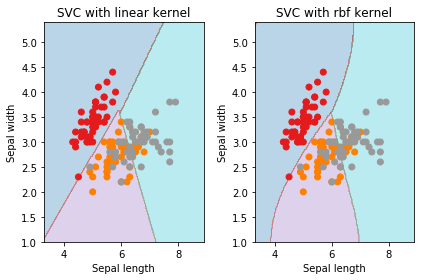

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] 
# we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset.
y = iris.target
# we create an instance of SVM and fit our data. We do not scale our data since we want to plot the support vectors.

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
X_plot = np.c_[xx.ravel(), yy.ravel()]

# Create the SVC model object
C = 1.0  # SVM regularization parameter
kernel_set = ['linear', 'rbf']
for i in range(2):
    svc = svm.SVC(kernel=kernel_set[i], C=C, decision_function_shape='ovr').fit(X,y)
    Z = svc.predict(X_plot)
    Z = Z.reshape(xx.shape)

    
    plt.subplot(1,2,i+1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC with %s kernel" %kernel_set[i])

plt.tight_layout()
plt.figure(figsize=(15,5))
plt.show()

### Parameter Tuning
Change the kernel type to rbf in below line and look at the impact.

Gamma: Kernel coefficient for 'rbf', 'poly', 'sigmoid'. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

C: Penalty parameter C of the error term. It also controls the trade off between smooth decision boundary and classifying the training points correctly.

We should always look at the cross validation score to have effective combination of these parameters and avoid over-fitting.

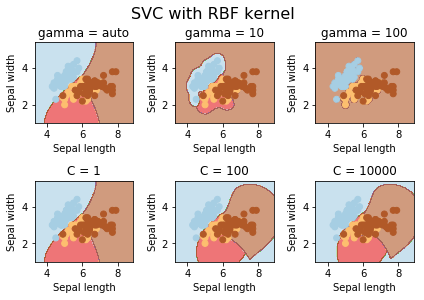

In [3]:
gamma_set = ['auto', 10, 100]
for i in range(len(gamma_set)):
    gamma = gamma_set[i]
    svc = svm.SVC(kernel='rbf', C=1, gamma=gamma).fit(X, y)
    x_min, x_max = X[:, 0].min()-1, X[: ,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[: ,1].max()+1
    h = (x_max / x_min) / 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.subplot(2,3,i + 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', cmap=plt.cm.Paired)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.title('gamma = %s' %gamma)

C_set = [1, 100, 10000]
for i in range(len(C_set)):
    C = C_set[i]
    svc = svm.SVC(kernel='rbf', C=C, gamma='auto').fit(X, y)
    x_min, x_max = X[:, 0].min()-1, X[: ,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[: ,1].max()+1
    h = (x_max / x_min) / 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.subplot(2,3,i + 4)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', cmap=plt.cm.Paired)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.title('C = %d' %C)

    plt.tight_layout()
plt.suptitle('SVC with RBF kernel', y=1.03, fontsize=16)
plt.show()

We will be using 5-fold cross validation to perform frid search to calculate optimal hyper-parameters. This is easily achieved in scikit-learn using the sklearn.model_selection.GridSearchCV class.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# shuffle the dataset
X, y = shuffle(X, y, random_state=0)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Set the parameters by cross-validation
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

print("# Tuning hyper-parameters")
print()

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on training set:

0.652 (+/-0.112) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.768 (+/-0.232) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.777 (+/-0.236) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.804 (+/-0.220) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.786 (+/-0.205) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.795 (+/-0.233) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.786 (+/-0.220) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.804 (+/-0.220) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.652 (+/-0.112) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.786 (+/-0.205) for {'C': 100, 'gam

In [5]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.60      0.82      0.69        11
          2       0.83      0.62      0.71        16

avg / total       0.81      0.79      0.79        38




## Pros and Cons associated with SVM
### Pros:
1. It works really well with clear margin of separation.
2. It is effective in high dimensional spaces.
3. It is effective in cases where number of dimensions is greater than the number of samples.
4. It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
### Cons:
1. It doesn’t perform well, when we have large data set because the required training time is higher.
2. It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping.
3. SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.

## Part II  SVM for Regression Problems
### Preparing Data for SVM Models
1. All data should be numerical.
2. SVM does not support missing values.
3. It would be best served to use the feature "normalization" before training the model.

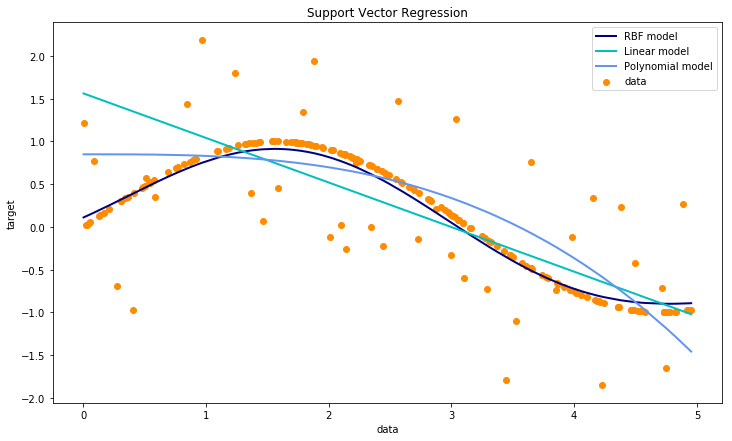

In [6]:
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(40))


from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=3)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

lw = 2
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### Parameter Tuning
The common hyper-parameters in the case of SVM regressors are C(the error term), $\epsilon$(specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value) and $\gamma$(Kernel coefficient for 'rbf', 'poly', 'sigmoid' kernels). Given our example is extremely simplified, we won't be able to observe any significant impact of any of these parameters. In general, similar to classification case, GridSearchCV can be used to tune SVM regression models as well.

# Concluding Remarks
So that brings us to an end to the different aspects of Support Vector Machine Learning Algorithms.

For pratical experience, SVMs are great for:
1. Small to medium data sets only. Training becomes extremly slow in the case of larger datasets.
2. Data sets with low noise. When the data set has more noise i.e. target classes are overlapping, SVM perform very poorly.
3. When feature dimensions are very large. SVMs are extremely helpful specially when no. of features is larger than no. of samples.

An important point to note is that the SVM doesn’t directly provide probability estimates, these are calculated using an expensive cross-validation in scikit-learn implementation.

Finally, as would be the case with any machine learning algorithm, I would suggest you to use SVM and analyze the power of SVMs by tuning various hyper-parameters. I want to hear your experience with SVM, how have you tuned SVM models to avoid over-fitting and reduce the training time? Please share your views and experiences in the comments below.